### Week 1, Numpy, Probability, statistics and gradient descent

In this session, we will review some concepts from probability, linear algebra and multivariate calculus (essentially gradient descent) and start deriving some of the simplest models in machine learning

__1a.__ Write a function that takes a 2d symmetric matrix as input and return the largest eigenvalue.


In [ ]:
# put your code here




__1b__ Do the same with arbitrary rectangular matrices and return the largest singular value

In [ ]:
# put your code here



__1b__ Modify the function above and write a second function that now takes two arguments. The first argument is a matrix $X$ with singular value decomposition $(\Sigma, U, V)$. The second argument is an integer $K$. The function should then output the matrix $X_{\text{approx}}$ defined from the singular value decomposition of your input as

$$X_{\text{approx}} = \sum_{i=1}^K \sigma_i u_iv_i^T$$



In [ ]:
# put your code here


__1c__ Consider the image shown below. Using the fact that every image is a 2D matrix. Apply your function to this image for various values of $K$. How large do you need to take $K$ to recover an clear image?

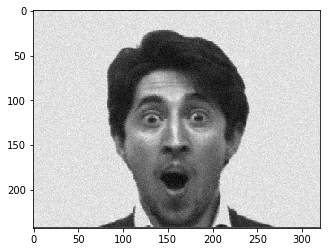

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('subject03.gif')
noisy = np.random.normal(img, 10)
imgplot = plt.imshow(noisy,cmap='gray')
plt.show()

In [ ]:
# put your code here



__1d__ Same question but now change the level of noise in the image. 

In [ ]:
# put your code here



__3. MAP and MLE__ Consider a univariate Gaussian distribution 

$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

Pick up a value for the variance and a value for the mean. Then generate a few samples $\left\{x_i\right\}$ from the distribution. 

- Start by deriving the log-likelihood function. Plot this function for various values of $\mu$ at $\sigma$ fixed. Then vary $\sigma$ and generate a plot for each value of $\sigma$. How do the plot compare to each other?

- As a second step, compute the estimators for $\sigma$ and $\mu$. Repeat the estimation for various draws of samples $\left\{x_i\right\}_{i=1}^n$ (keep the size of the sample fixed)

In [ ]:
# put the code here



__3b From MLE to MAP: Coin flipping__

As a second exercise, we consider flipping a coin. The distribution of heads (resp. tails) can be modelled as a Bernoulli in this case. We thus have 

$$p(x|\theta) = \theta^x(1 - \theta)^{1-x}$$

for $x = 0$ or $1$. 

- Choose a value for $\theta$ then generate a sequence of 20 coin tosses using the Bernoulli distribution. Without yet thinking of the MLE or MAP, from your sequence, what would be a reasonable estimator of the probability to get a head?



In [ ]:
# put your code here



- Derive the expression for the MLE and compute its value from the samples you generated above. Justify your developments.

- Still using your parameter $\theta$, imagine that you get the following sequence 

$$[1,1,1,1,1,1,1]$$

What would be the MLE in this case? Does that seems reasonable ?

- To be more fair, we will now use a prior. Since the Bernoulli distribution is in the exponential family, a good choice of prior is to take the conjugate prior which in this case is a Beta distribution. Plot the Beta distribution for a few pairs of parameters $(\alpha, \beta)$. What could be a good choice of prior? 


In [ ]:
# put your code here 




- If we neglect the normalizing factor in the Beta distribution, give the expression of the posterior. What distribution does the posterior correspond to?


 - Pick a value for $\theta$ (other than 0.5) and generate flipping sequences of length $0$, $5$, $15$ and $30$. For each, plot the resulting posterior, using the expression that you derived above. Approximately, what estimator do you get for the number of heads when taking all $30$ trials into account? 

In [ ]:
# put your code here 




- Repeat the experiments above but assuming that surprisingly all your outcomes are '1'. That is, generate the posterior for outcomes given by vectors of all 1, of repsective lengths $0$, $5$, $15$, $30$. Also give the MLE at each step.

In [ ]:
# put your code here



__4a. Towards regression__ We now want to extend the previous result to a multivariate normal distribution. 

- Start by generating data along a line. I.e generate pairs of $(\boldsymbol x \in \mathbb{R}^n,y)$ with 

$$ y =\boldsymbol x^T \boldsymbol b$$

for some $\boldsymbol b\in\mathbb{R}^n$ and biais $b_0$ that you can choose as you want.  

- Then add some Gaussian noise with variance $1$ to the variables $y$, i.e. you should now have an expression of the form

$$ y_i =\boldsymbol x_i^T \boldsymbol b + \varepsilon_i$$

- What is the distribution of the $y_i$ ? Find the expression of the likelihood function in this case. How about the log-likelihood?

- How can you compute the MLE?


In [ ]:
# put your code here



__4b From theory to practice__ Download and open (use pandas) the following [salary dataset](https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/salary_table.csv)

- Extract the sequences correspondind to the salaries and years of experience. 

- Start by plotting the data with the function scatter from pyplot.

- We will use the linear gaussian model that we discussed above and assume that the salary can be expressed as directly proportionnal to the number of years of experience. I.e.

$$s = \beta_1 y_i + \beta_0 \varepsilon_i$$

we further assume that the samples are independent. Using the MLE, derive an expression for the regression coefficients $\beta_1$ and $\beta_0$. What problem do you need to solve to get $\beta_1$ and $\beta_0$ ?
(Hint, start by deriving the expression for $\beta_0$ and $\beta_1$ by computing the derivatives and setting them to $0$. Then substitute the expression for $\beta_0$ into the expression for $\beta_1$ and solve this last expression.)

- Plot your model (i.e. $\beta_1 y + \beta_0$) on top of the data using pyplot. You are done with your first machine learning algorithm. 


In [ ]:
# put your code here




__4c. From univariate to multivariate__




__5. Gradient descent: Walking down the hill__

As we have seen in class, except when there are very simple and can be solved explicitely, the parameters of most models in machine learning are set through optimization. As a first exercise, we will consider a simple model. Let us first consider the simple linear regression landscape


__Exercise 5.a.__  Consider the following function whose plot is given below. You can uncomment the first line to activate interactive plot on jupyter and use the "plt.ioff()
%matplotlib inline" cell below to turn the interactive mode off

$$f(x,y) =  3(1-x)^2 e^{-(x^2) - (y+1)^2}- 10(x/5 - x^3 - y^5)e^{-x^2-y^2}- \frac{1}{3} e^{-(x+1)^2 - y^2}$$


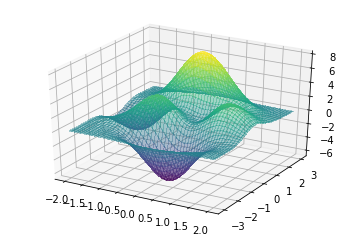

In [4]:
#%matplotlib notebook # use to activate interactive plotting 
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(x, y, indexing='xy')

z = 3*((1-xx)**2) * np.exp(-(xx**2) - (yy+1)**2) \
- 10*(xx/5 - xx**3 - yy**5) * np.exp(-xx**2 - yy**2)- (1/3)* np.exp(-(xx+1)**2 - yy**2)

from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d    


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap=cm.viridis,alpha=.4,
                       linewidth=0, antialiased=False)

plt.show()


In [ ]:
plt.ioff()
%matplotlib inline

Code a simple gradient algorithm (see corresponding note on the website). Set the parameters as follows

- learning rate = step size: 0.1 
- Max number of iterations: 20 
- Stopping criterion: 0.0001 (Your iterations should stop when your gradient is smaller than the threshold)

Then start your algorithm at 

- (x0 = 0.5, y0 = -0.5)
- (x0 = -0.3, y0 = -0.3)

And plot the iterations on top of the function (you can use the 3D plotting tools from matplolib or the simpler 'contourf' function). What do you see ?